In [1]:
# import libraries

import pandas as pd
import numpy as np

In [2]:
#import df's
#note warning for mixed data types

data = pd.read_csv('data/final-complete-data-set.csv')
abnormal = pd.read_csv('data/final-anormal-data-set.csv')
normal = pd.read_csv('data/final-normal-data-set.csv')
 
data.info()

/Users/jadeadams/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95312 entries, 0 to 95311
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_guest                      95311 non-null  float64
 1   cpu_guest_nice                 95311 non-null  float64
 2   cpu_idle                       95311 non-null  float64
 3   cpu_iowait                     95311 non-null  float64
 4   cpu_irq                        95310 non-null  float64
 5   cpu_nice                       95310 non-null  float64
 6   cpu_softirq                    95311 non-null  float64
 7   cpu_steal                      95310 non-null  float64
 8   cpu_system                     95311 non-null  float64
 9   cpu_total                      95310 non-null  float64
 10  cpu_user                       95311 non-null  float64
 11  diskio_sda1_disk_name          95312 non-null  object 
 12  diskio_sda1_key                95312 non-null 

In [3]:
# add target var to normal and abnormal df

#0 is not hijacked, 1 is not hijacked
normal['target'] = 0

abnormal['target'] = 1

abnormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_guest                      14461 non-null  int64  
 1   cpu_guest_nice                 14461 non-null  int64  
 2   cpu_idle                       14461 non-null  float64
 3   cpu_steal                      14460 non-null  float64
 4   cpu_iowait                     14461 non-null  float64
 5   cpu_irq                        14460 non-null  float64
 6   cpu_nice                       14460 non-null  float64
 7   cpu_softirq                    14461 non-null  float64
 8   cpu_system                     14461 non-null  float64
 9   cpu_total                      14460 non-null  float64
 10  cpu_user                       14461 non-null  float64
 11  diskio_sda1_disk_name          14461 non-null  object 
 12  diskio_sda1_key                14461 non-null 

In [4]:
abnormal['target'].value_counts()

1    14461
Name: target, dtype: int64

In [5]:
#create merged df

df = normal.append(abnormal)


df.dropna(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 95310 entries, 0 to 14460
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_guest                      95310 non-null  float64
 1   cpu_guest_nice                 95310 non-null  float64
 2   cpu_idle                       95310 non-null  float64
 3   cpu_iowait                     95310 non-null  float64
 4   cpu_irq                        95310 non-null  float64
 5   cpu_nice                       95310 non-null  float64
 6   cpu_softirq                    95310 non-null  float64
 7   cpu_steal                      95310 non-null  float64
 8   cpu_system                     95310 non-null  float64
 9   cpu_total                      95310 non-null  float64
 10  cpu_user                       95310 non-null  float64
 11  diskio_sda1_disk_name          95310 non-null  object 
 12  diskio_sda1_key                95310 non-null 

# Exploratory Data Analysis

As there are 81 different potential variables, understanding all the variables may be a struggle. As I am a data scientist, not a software engineer, it becomes difficult to understand the shorthand version names listed such as "network_lo_cx" or "diskio_sdal_key". Fortunately, given the machine learning tools available, the algorithms will be able to parse through valuable numeric and discard. On the other hand, a brief scan through the variables shows that there is a high likelihood some of the numeric and object columns may be better scaled as categorial types.

One useful thing we will first do is to first parse through the object columns and see what the values of each show:

In [6]:
#build list of columns that have non-int/float params

object_col_names = []

for name in list(df.columns):
    if df[name].dtypes == object:
        #examine printed values along with counts
        print("Value counts of unique vals in ", name, " col:", df[name].value_counts())
        print("Number of unique values in column ", name, " ", len(df[name].unique()))
        object_col_names.append(name)

Value counts of unique vals in  diskio_sda1_disk_name  col: sda1    95310
Name: diskio_sda1_disk_name, dtype: int64
Number of unique values in column  diskio_sda1_disk_name   1
Value counts of unique vals in  diskio_sda1_key  col: disk_name    95310
Name: diskio_sda1_key, dtype: int64
Number of unique values in column  diskio_sda1_key   1
Value counts of unique vals in  diskio_sda1_time_since_update  col: 1.0886559486389158    14
1.089607000350952     12
1.08754301071167      12
1.0877339839935305    11
1.088135004043579     11
                      ..
1.284883975982666      1
1.0827479362487793     1
1.018777847290039      1
1.3124818801879885     1
1.1942591667175293     1
Name: diskio_sda1_time_since_update, Length: 67719, dtype: int64
Number of unique values in column  diskio_sda1_time_since_update   67719
Value counts of unique vals in  diskio_sda_disk_name  col: sda    95310
Name: diskio_sda_disk_name, dtype: int64
Number of unique values in column  diskio_sda_disk_name   1
Value

From the output above we can see that there are some columns that need to be converted into numerical types, and there are others that are strings that may be worthwhile as categories. For the string col's:

1. vm4-web-server has 5 unique values:

vm2-node                 21015
vm1-graph-analytics      18423
localhost.localdomain    14460
vm3-tomcat               13583

2. timestamp col needs to be converted to datetime index

3.

In [7]:
#eda

df['timestamp'] = pd.to_datetime(df['timestamp'])

<AxesSubplot:>

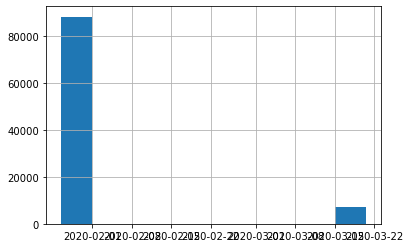

In [9]:
df['timestamp'].hist()